<a href="https://colab.research.google.com/github/scumpustefania16/Tema1_IA/blob/main/Tema3_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import fpgrowth, apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Încarcă datele FAO (deja uploadate manual)
df = pd.read_csv("/content/consumption_user.csv")

# Vizualizare inițială
df.head()


/tmp/ipython-input-2022340024.py:2: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/consumption_user.csv")


,SUBJECT,ROUND,SURVEY_DAY,RESPONDER,SEASON,CONSUMPTION_DAY,CONSUMPTION_MONTH,CONSUMPTION_YEAR,WEEK_DAY,EXCEPTION_DAY,...,BCAROT_mcg,RETOL_mcg,VITD_mcg,VITE_mg,VITK_mcg,PHY_mg,N6_g,VITD_IU,PREP_METHOD,VERSION
0,1,1,1,3,NaN,NaN,4,2012,1,4.0,...,5,NaN,0.0,0.03,0.53,NaN,0.00,0.0,"Raw / No further processed (e.g., bread, torti...",16-Jun-21
1,1,1,1,3,NaN,NaN,4,2012,1,4.0,...,0,NaN,0.0,0.80,0.00,NaN,0.00,0.0,"Raw / No further processed (e.g., bread, torti...",NaN
2,1,1,1,3,NaN,NaN,4,2012,1,4.0,...,5,NaN,0.0,0.03,0.51,NaN,0.00,0.0,"Raw / No further processed (e.g., bread, torti...",NaN
3,1,1,1,3,NaN,NaN,4,2012,1,4.0,...,0,NaN,0.0,0.00,0.00,NaN,0.00,0.0,Boiled,NaN
4,1,1,1,3,NaN,NaN,4,2012,1,4.0,...,0,NaN,0.0,0.18,0.30,NaN,0.18,0.0,Boiled,NaN


In [ ]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   SUBJECT  0 non-null      int64
 1   ROUND    0 non-null      int64
dtypes: int64(2)
memory usage: 0.0 bytes


,SUBJECT,ROUND
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [ ]:
df = df.dropna()
df = df.drop_duplicates()

print("Dimensiunea după curățare:", df.shape)


Dimensiunea după curățare: (0, 2)


In [ ]:
df = pd.read_csv("/content/consumption_user.csv")
print("Dataset încărcat cu succes")

print(list(df.columns))

# identificăm coloana ID (numerică)
id_cols = df.select_dtypes(include=['int64', 'int32']).columns

# identificăm coloana aliment (text)
food_cols = df.select_dtypes(include=['object', 'string']).columns

print("Coloane ID posibile:", list(id_cols))
print("Coloane FOOD posibile:", list(food_cols))

# verificare de siguranță
if len(id_cols) == 0 or len(food_cols) == 0:
    raise ValueError("Nu există coloane potrivite pentru ID sau FOOD în dataset")

id_col = id_cols[0]
food_col = food_cols[0]

print("Folosim ID:", id_col)
print("Folosim FOOD:", food_col)

df_simple = df[[id_col, food_col]].dropna()

transactions = df_simple.groupby(id_col)[food_col].apply(list)

transactions.head()


/tmp/ipython-input-126152649.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/consumption_user.csv")


Dataset încărcat cu succes
['SUBJECT', 'ROUND', 'SURVEY_DAY', 'RESPONDER', 'SEASON', 'CONSUMPTION_DAY', 'CONSUMPTION_MONTH', 'CONSUMPTION_YEAR', 'WEEK_DAY', 'EXCEPTION_DAY', 'CONSUMPTION_TIME_HOUR', 'CONSUMPTION_TIME_MINUTES', 'MEAL_NAME', 'PLACE', 'FOOD_TYPE', 'RECIPE_CODE', 'RECIPE_DESCR', 'RECIPE_DESCR_ENG', 'FOODEX2_RECIPE_CODE', 'FOODEX2_RECIPE_DESCR', 'AMOUNT_RECIPE', 'CODE_INGREDIENT', 'INGREDIENT', 'INGREDIENT_ENG', 'FOODEX2_INGR_CODE', 'FOODEX2_INGR_DESCR', 'FOOD_AMOUNT_UNPROC', 'FOOD_AMOUNT_CONS', 'FOOD_AMOUNT_REPORTED', 'ENERGY_kcal', 'WATER_g', 'PROTEIN_g', 'A_PROT_g', 'V_PROT_g', 'CARBOH_g', 'SUGAR_g', 'FIBTG_g', 'ALCOHOL_g', 'FAT_g', 'SAT_FAT_g', 'MUFA_g', 'PUFA_g', 'TFA_g', 'CHOL_mg', 'CALC_mg', 'IRON_mg', 'ZINC_mg', 'MG_mg', 'PHOS_mg', 'POTA_mg', 'NA_mg', 'CU_mg', 'IOD_mcg', 'SE_mcg', 'MN_mg', 'VITC_mg', 'THIA_mg', 'RIBO_mg', 'NIAC_mg', 'VITB5_mg', 'VITB6_mg', 'FOLDFE_mcg', 'FOL_mcg', 'FOLFD_mcg', 'FOLFRE_mcg', 'FOLAC_mcg', 'VITB12_mcg', 'VITA_RAE_mcg', 'VITA_RE_mcg', '

,RECIPE_DESCR
SUBJECT,
1,"[ESPAGUETI CON JITOMATE, PREPARACI_N ESTANDARI..."
2,"[HUEVO REVUELTO, PREPARACI_N ESTANDARIZADA, HU..."
3,"[CAF_ CON LECHE CON AZUCAR, PREPARACI_N ESTAND..."
4,"[AGUA DE FRUTA, AGUA DE FRUTA, AGUA DE FRUTA, ..."
5,"[FRIJOL PREPARADO, FRIJOL PREPARADO, QUESADILL..."


In [ ]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_array, columns=te.columns_)

df_encoded.head()


,FRESA CON CREMA,ACELGA CON LIMON Y SAL,ADEREZO,ADOBO,ADOBO CON CARNE DE PUERCO,AGUA CON AZUCAR,AGUA CON CHOCOLATE,AGUA DE AVENA,AGUA DE CEREAL,AGUA DE FRESA,...,VERDURA COCIDA,"VERDURA FRITA, PREPARACI_N ESTANDARIZADA",YOGURT CON CEREAL,"YOGURT CON CEREAL, PREPARACI_N ESTANDARIZADA",YOGURT CON FRUTA,YOGURT CON GRANOLA,YOGURT DE FRUTA CON CEREAL,ZANAHORIA CON LIMON,ZANAHORIA CON LIMON Y SAL,ZANAHORIA CON SAL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets_fp = fpgrowth(
    df_encoded,
    min_support=0.02,
    use_colnames=True
)

frequent_itemsets_fp.sort_values(by="support", ascending=False).head(10)


,support,itemsets
13,0.174061,(CAFE CON AZUCAR)
14,0.163823,"(FRIJOLES DE OLLA, PREPARACI_N ESTANDARIZADA)"
8,0.122488,(HUEVO REVUELTO)
3,0.102673,(SOPA DE PASTA)
4,0.095184,"(FRIJOLES REFRITOS CON ACEITE, PREPARACI_N ES..."
15,0.089211,"(CAF_ O T_ CON AZ_CAR, PREPARACI_N ESTANDARIZADA)"
9,0.083807,"(ARROZ ROJO FRITO, SIN VERDURAS, PREPARACI_N ..."
1,0.072241,"(SOPA DE PASTA CASERA, PREPARACI_N ESTANDARIZADA)"
7,0.070535,(FRIJOL PREPARADO)
16,0.067406,(LECHE CON CHOCOLATE)


In [ ]:
rules_fp = association_rules(
    frequent_itemsets_fp,
    metric="confidence",
    min_threshold=0.3
)

rules_fp = rules_fp[rules_fp['lift'] > 1]

rules_fp.sort_values(by="lift", ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


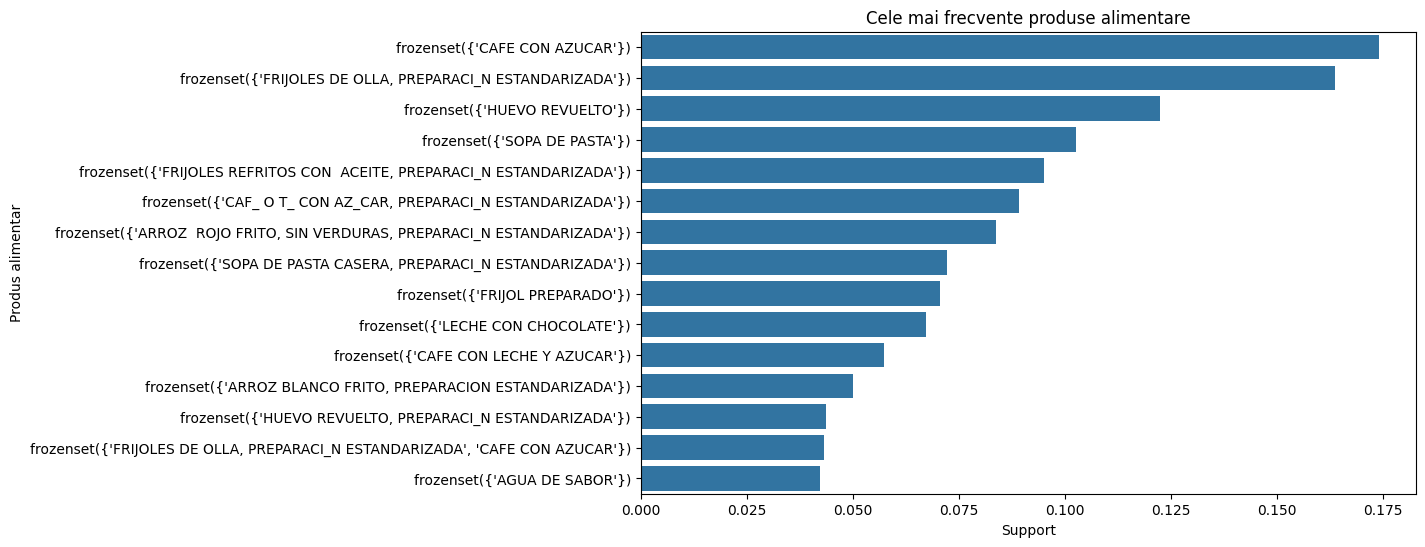

In [ ]:
top_items = frequent_itemsets_fp.sort_values(by='support', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_items['support'],
    y=top_items['itemsets'].astype(str)
)
plt.title("Cele mai frecvente produse alimentare")
plt.xlabel("Support")
plt.ylabel("Produs alimentar")
plt.show()


In [ ]:
import time

start_fp = time.time()
fpgrowth(df_encoded, min_support=0.02, use_colnames=True)
time_fp = time.time() - start_fp

start_ap = time.time()
apriori(df_encoded, min_support=0.02, use_colnames=True)
time_ap = time.time() - start_ap

print(f"Timp execuție FP-Growth: {time_fp:.2f} secunde")
print(f"Timp execuție Apriori:   {time_ap:.2f} secunde")


Timp execuție FP-Growth: 0.71 secunde
Timp execuție Apriori:   0.09 secunde
